# EDA: Chicago Food Inspections
## columna: results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
inspections = pd.read_csv('../../Food_Inspections.csv')

In [3]:
inspections.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/2021,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,2386523,MC DONALD'S,MC DONALD'S,2560785.0,Restaurant,Risk 2 (Medium),6336 S ASHLAND AVE,CHICAGO,IL,60636.0,08/26/2020,Short Form Complaint,Pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


In [4]:
percentage = lambda i: len(i) / float(len(x)) * 100

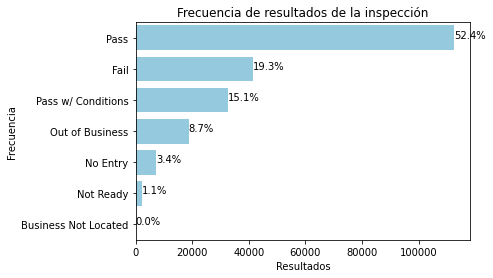

In [5]:
a = sns.countplot(y="Results", data=inspections,
                  order = inspections['Results'].value_counts().index, color="skyblue")
a.set_title("Frecuencia de resultados de la inspección")
a.set_ylabel("Frecuencia")
a.set_xlabel("Resultados")

total = len(inspections['Results'])
for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(percentage, (x, y))

plt.show()

In [7]:
inspections_aux = inspections.copy()
inspections_aux.Results.mask(inspections_aux.Results == 'Pass w/ Conditions', 'Pass', inplace=True)

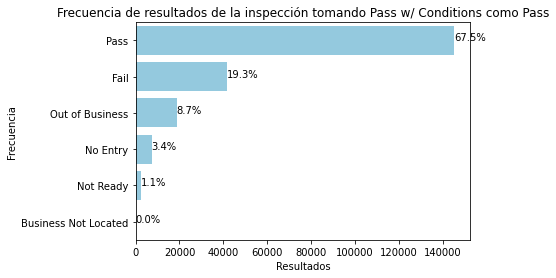

In [9]:
b = sns.countplot(y="Results", data=inspections_aux,
                  order = inspections_aux['Results'].value_counts().index, color="skyblue")
b.set_title("Frecuencia de resultados de la inspección tomando Pass w/ Conditions como Pass")
b.set_ylabel("Frecuencia")
b.set_xlabel("Resultados")

total = len(inspections_aux['Results'])
for p in b.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        b.annotate(percentage, (x, y))

plt.show()

+ En esta columna no se encontró ningún valor faltante

+ En el ~67% de las inspecciones el establecimiento pasó la inspección, donde:
    + ~15% pasó la inspección condicionalmente
    + ~50% pasó la inspección satisfactoriamente
+ En el ~19% de las inspecciones el establecimiento reprobó la inspección.
+ ~9% de los establecimientos ya había cerrado al momento de la inspección.
+ ~3% de los establecimientos no presentan inspección por alguna razón
+ ~1% de los estableciemitnos no se encontraban listos para recibir la inspección
+ Mientras que muy pocos establciemientos ~0%, no fueron localizados y por lo tanto no se pudo realizar la inspección.